## 『本次練習內容』
#### 運用這幾天所學觀念搭建一個CNN分類器

## 『本次練習目的』
  #### 熟悉CNN分類器搭建步驟與原理
  #### 學員們可以嘗試不同搭法，如使用不同的Maxpooling層，用GlobalAveragePooling取代Flatten等等

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)

## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7) 
        return X_train, X_test,mean,std
    
    
## Normalize Training and Testset    
x_train, x_test,mean_train,std_train = normalize(x_train, x_test) 

(50000, 32, 32, 3)


In [18]:
(x_train1, y_train1), (x_test1, y_test1) = cifar10.load_data()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


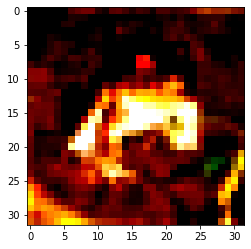

In [21]:
plt.imshow(x_train[0])
plt.show() 

In [22]:
x_train1[0].shape

(32, 32, 3)

In [3]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [4]:
classifier=Sequential()

#卷積組合
classifier.add(Convolution2D(16,(3,3),input_shape=(32,32,3),activation='relu'))#32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(BatchNormalization())

'''自己決定MaxPooling2D放在哪裡'''
classifier.add(MaxPooling2D(pool_size=(2,2)))

#卷積組合
classifier.add(Convolution2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
classifier.add(BatchNormalization())

#flatten
classifier.add(Flatten())

#FC
classifier.add(Dense(units=256, kernel_initializer='normal', activation='relu')) #output_dim=100,activation=relu
classifier.add(Dropout(0.3))

#輸出
classifier.add(Dense(output_dim=10,activation='softmax'))

#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


In [5]:
epochs = 6
batch_size = 100

In [6]:
from keras.callbacks import TensorBoard
file_name = str(epochs)+'_'+str(batch_size)
TB = TensorBoard(log_dir='logs/'+file_name, histogram_freq=1, 
                 write_images=True,
                 write_graph=True, 
                 write_grads=True)

/Applications/anaconda3/lib/python3.7/site-packages/keras/callbacks/tensorboard_v2.py:97: UserWarning: The TensorBoard callback does not support gradients display when using TensorFlow 2.0. The `write_grads` argument is ignored.
  warnings.warn('The TensorBoard callback does not support '


In [7]:
train_history=classifier.fit(x_train,y_train,
                             batch_size=batch_size,
                             epochs=epochs, 
                             validation_split=0.2,
                             callbacks=[TB]
                             )

Train on 40000 samples, validate on 10000 samples
Epoch 1/6
40000/40000 [==============================] - 31s 768us/step - loss: 2.1597 - acc: 0.4383 - val_loss: 1.3521 - val_acc: 0.5289
Epoch 2/6
40000/40000 [==============================] - 30s 739us/step - loss: 1.1124 - acc: 0.6120 - val_loss: 1.1067 - val_acc: 0.6186
Epoch 3/6
40000/40000 [==============================] - 28s 701us/step - loss: 0.8750 - acc: 0.6927 - val_loss: 1.1084 - val_acc: 0.6267
Epoch 4/6
40000/40000 [==============================] - 30s 758us/step - loss: 0.7130 - acc: 0.7488 - val_loss: 1.0571 - val_acc: 0.6511
Epoch 5/6
40000/40000 [==============================] - 31s 765us/step - loss: 0.5685 - acc: 0.8019 - val_loss: 1.0946 - val_acc: 0.6550
Epoch 6/6
40000/40000 [==============================] - 32s 797us/step - loss: 0.4562 - acc: 0.8407 - val_loss: 1.2069 - val_acc: 0.6462


In [8]:
history = train_history

In [9]:
import matplotlib.pyplot as plt # 基本的繪圖套件

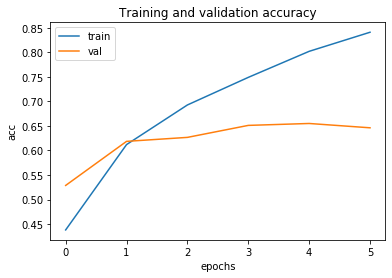

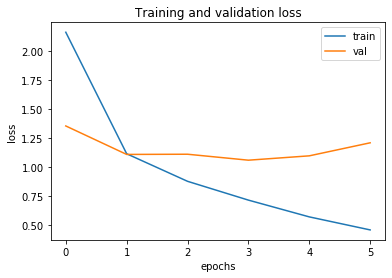

In [10]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, label='train')
plt.plot(epochs, val_acc,label = 'val')
plt.legend()
plt.show()
plt.clf()

# Plot training and validation loss per epoch
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(epochs,loss,label='train')
plt.plot(epochs,val_loss,label='val')

plt.legend()
plt.show()

In [11]:
# 顯示訓練成果(分數)
scores = classifier.evaluate(x_test, y_test)  
print(scores)

10000/10000 [==============================] - 2s 243us/step
[1.1976940362930297, 0.6460999846458435]


In [12]:
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  

	[Info] Accuracy of testing data = 64.6%


In [13]:
# 預測(prediction)
X = x_test[0:10,:]
predictions = classifier.predict_classes(X)
# get prediction result
print(predictions)

[3 8 8 0 6 3 1 6 3 1]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


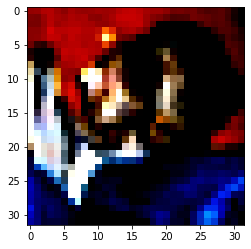

In [14]:
# 顯示 第一筆訓練資料的圖形，確認是否正確
plt.imshow(x_test[0])
plt.show() 

## 預測新圖片，輸入影像前處理要與訓練時相同
#### ((X-mean)/(std+1e-7) ):這裡的mean跟std是訓練集的
## 維度如下方示範

In [15]:
input_example=(np.zeros(shape=(1,32,32,3))-mean_train)/(std_train+1e-7) 
classifier.predict(input_example)

array([[1.05671361e-02, 8.96209622e-06, 5.44808924e-01, 8.89256299e-02,
        2.93802112e-01, 1.20304863e-03, 5.77038787e-02, 4.06672043e-04,
        2.45986506e-03, 1.13823626e-04]], dtype=float32)